In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("../datasets/iris.csv")

In [3]:
df.shape

(150, 5)

In [4]:
df.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')

In [5]:
df.dtypes

sepal_length    float64
sepal_width     float64
petal_length    float64
petal_width     float64
species          object
dtype: object

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [7]:
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [8]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [9]:
df.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [10]:
df["species"] = df["species"].astype("category")

In [11]:
df.dtypes

sepal_length     float64
sepal_width      float64
petal_length     float64
petal_width      float64
species         category
dtype: object

In [12]:
features = df.iloc[:, df.columns != "species"].columns
axis = [[0, 0], [0, 1], [1, 0], [1, 1]]

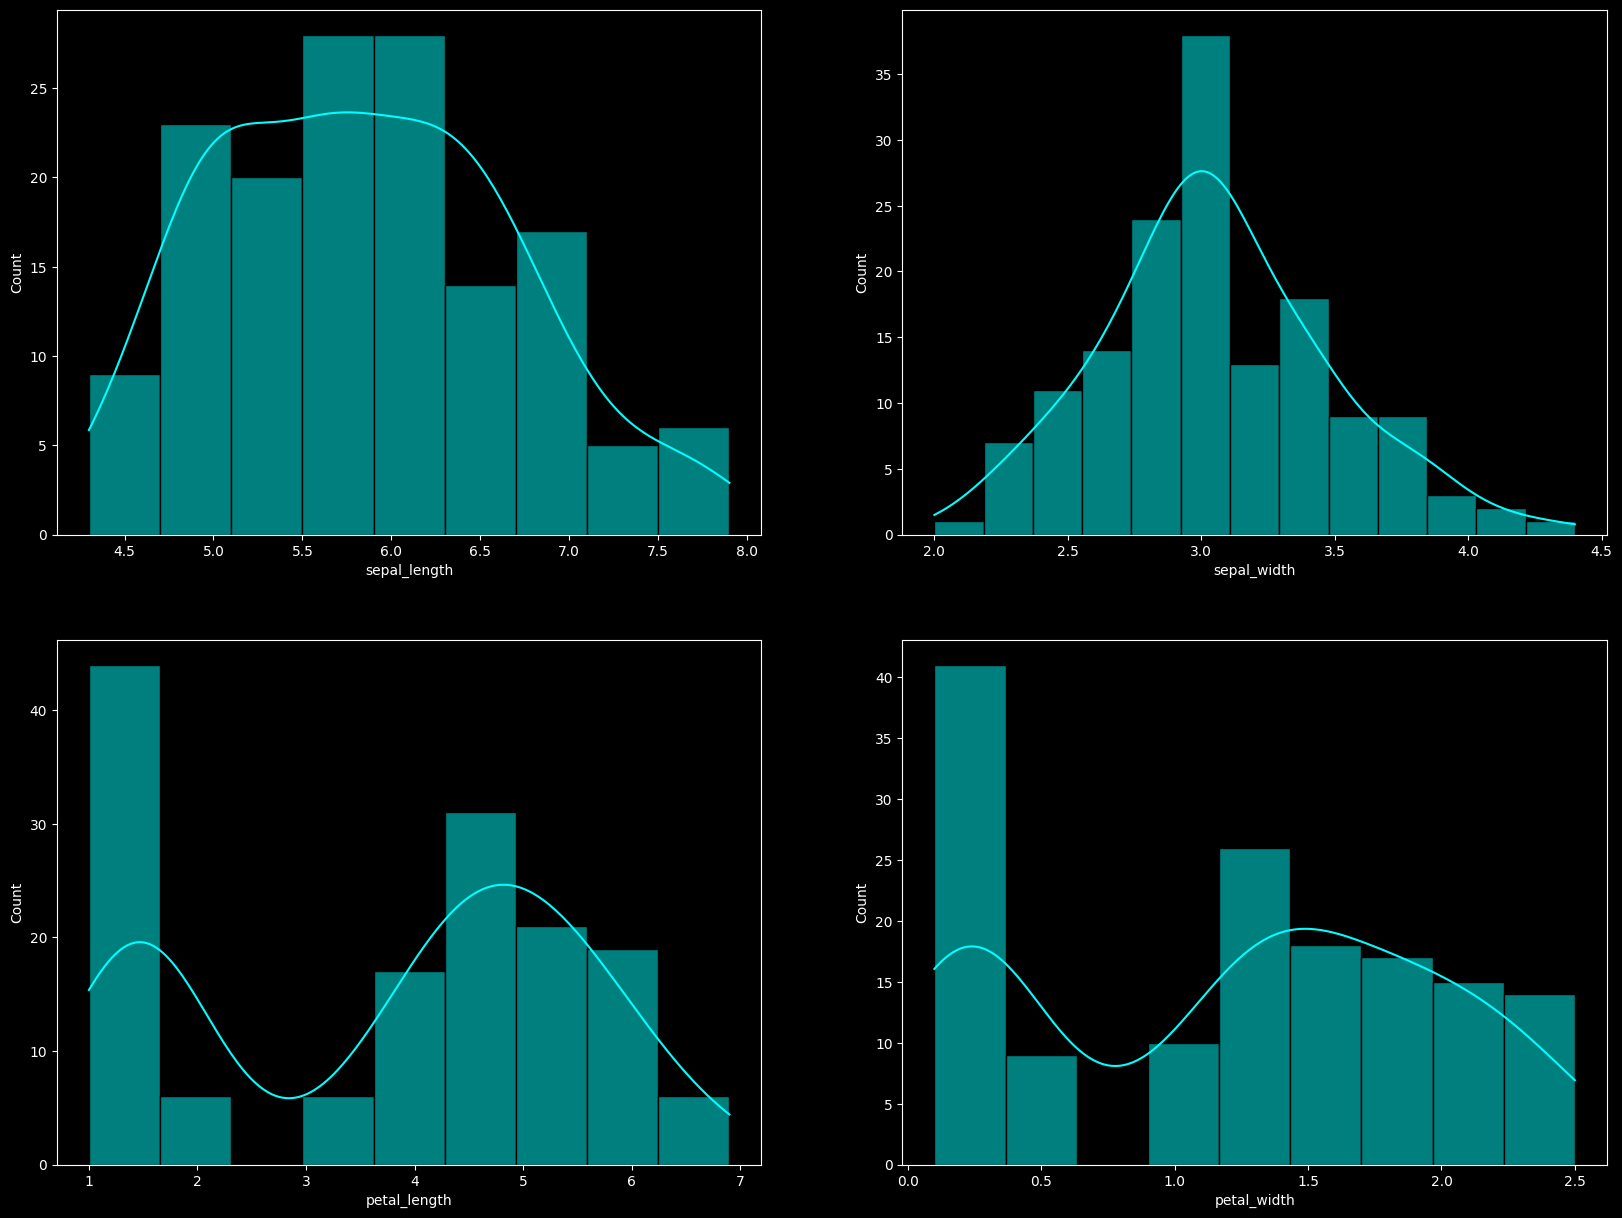

In [13]:
fig, axs = plt.subplots(2, 2, figsize=(20, 15))
axs = axs.flatten()
for i, label in enumerate(features):
    sns.histplot(data=df, x=label, color="cyan", edgecolor="black", ax=axs[i], kde=True)

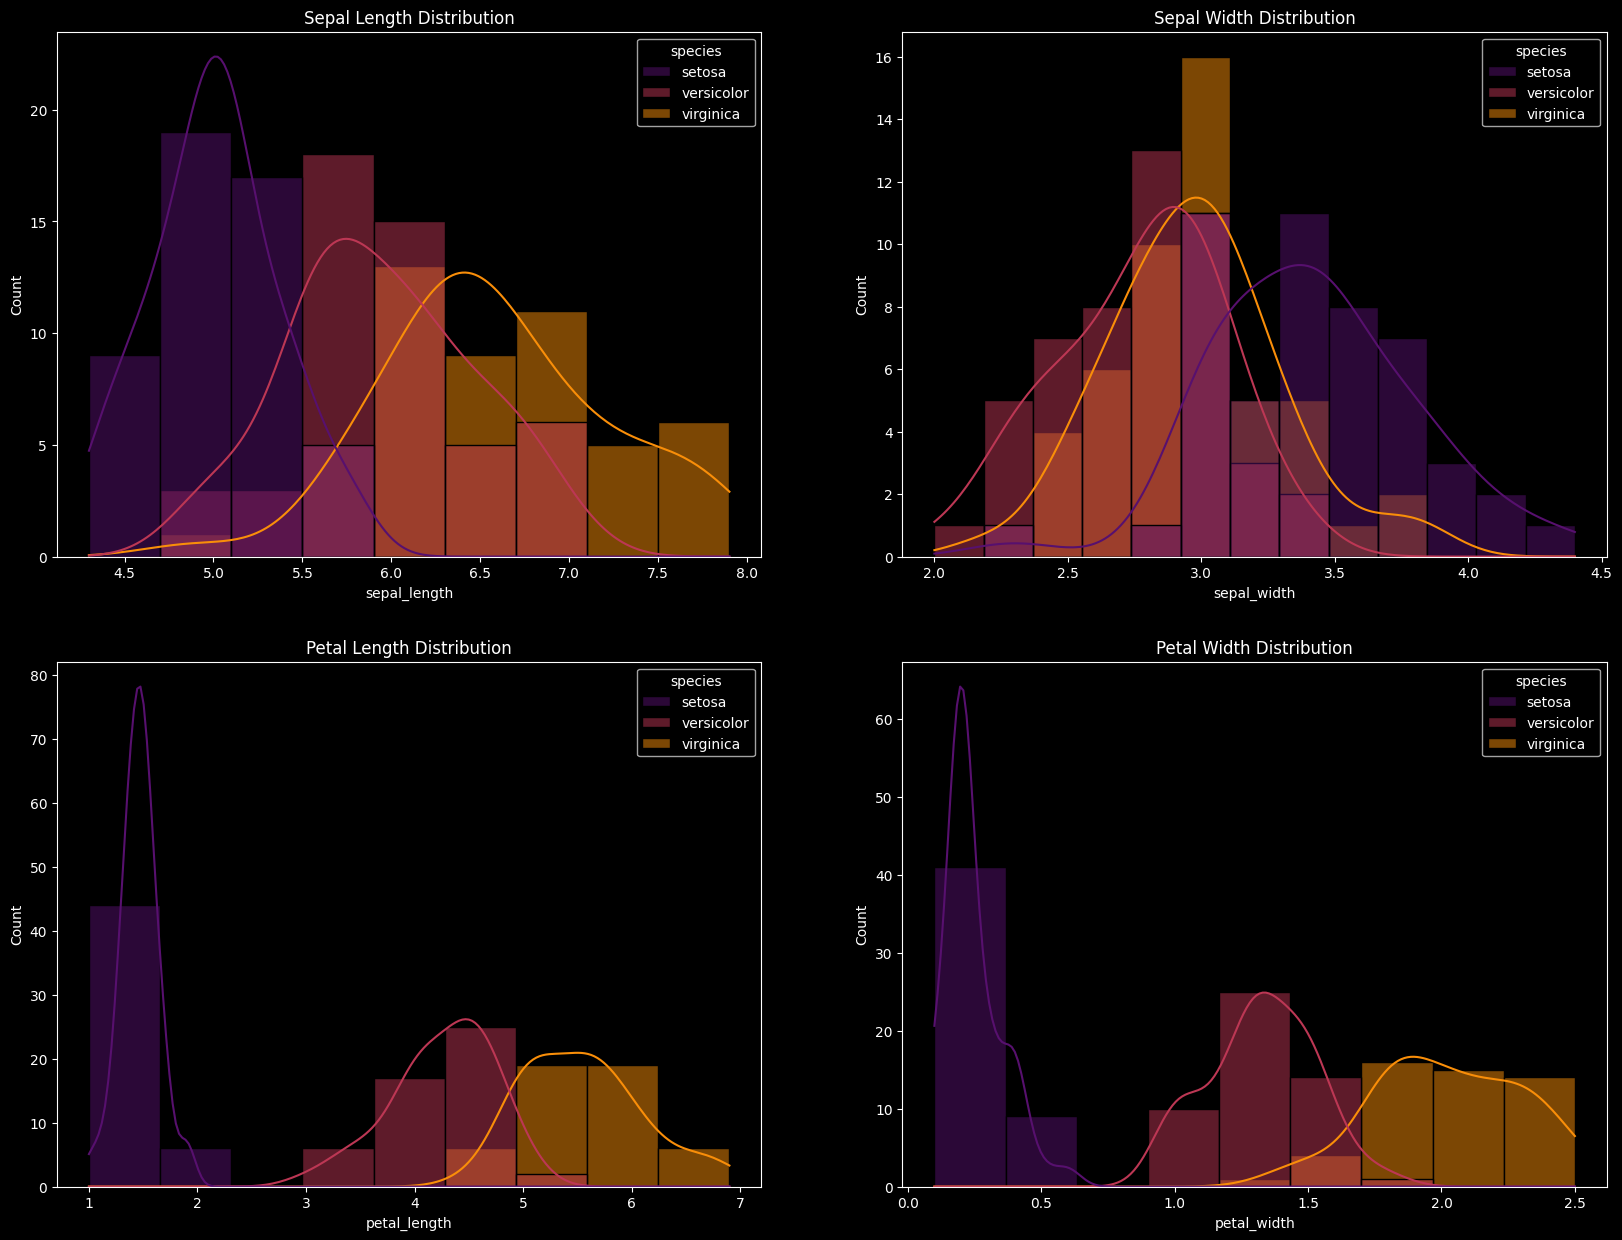

In [14]:
fig, axs = plt.subplots(2, 2, figsize=(20, 15))
axs = axs.flatten()

for i, label in enumerate(features):
    sns.histplot(
        data=df,
        x=label,
        hue="species",
        kde=True,
        color="coral",
        edgecolor="black",
        ax=axs[i],
        palette="inferno",
    )
    axs[i].set_title(f"{label.replace("_", " ").title()} Distribution")

<Axes: >

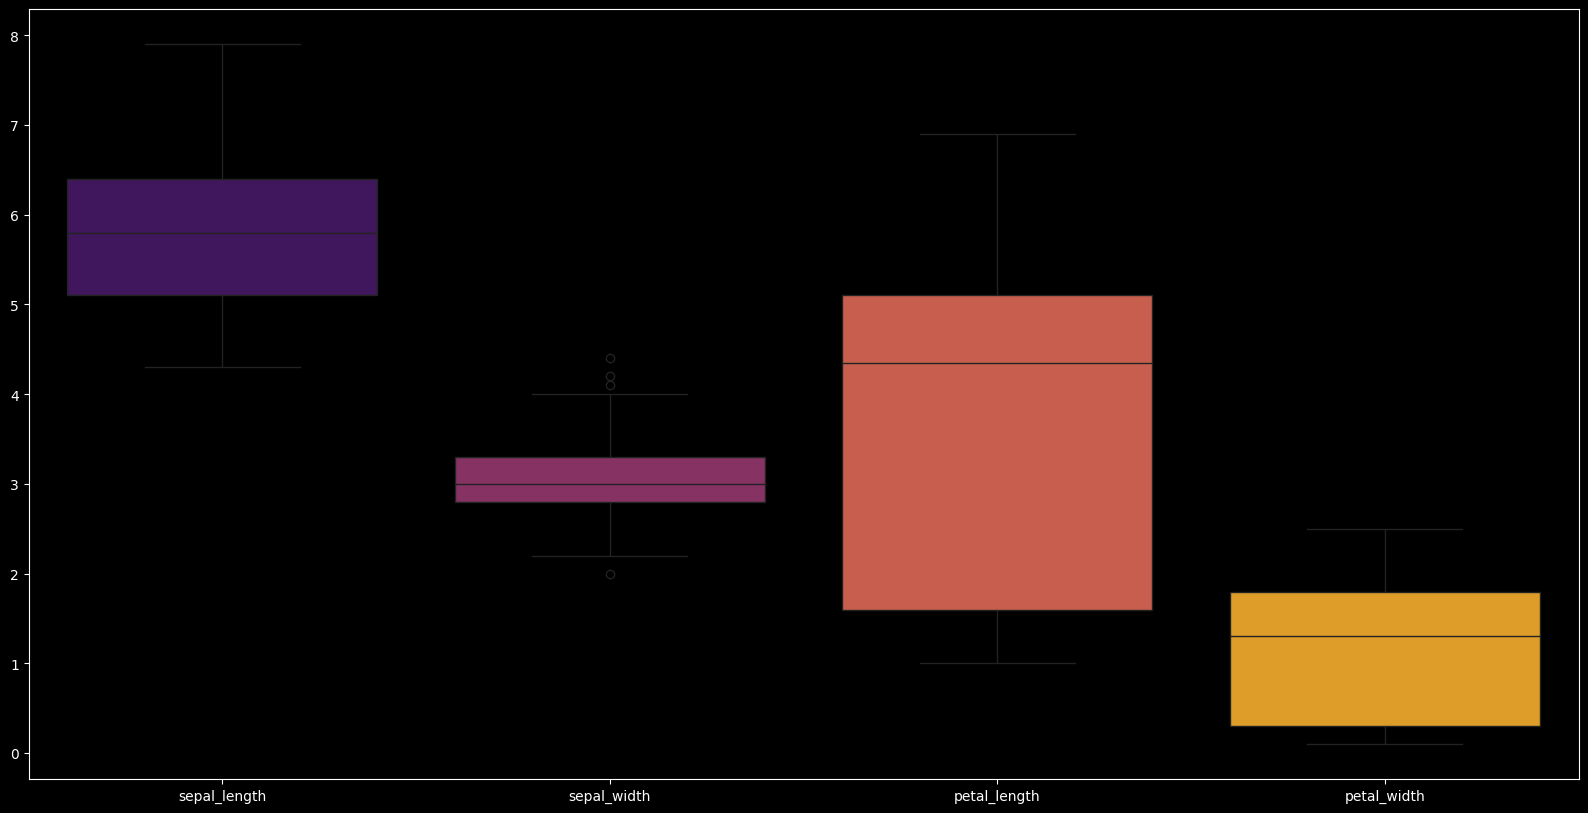

In [15]:
plt.figure(figsize=(20, 10))
sns.boxplot(data=df, palette="inferno")

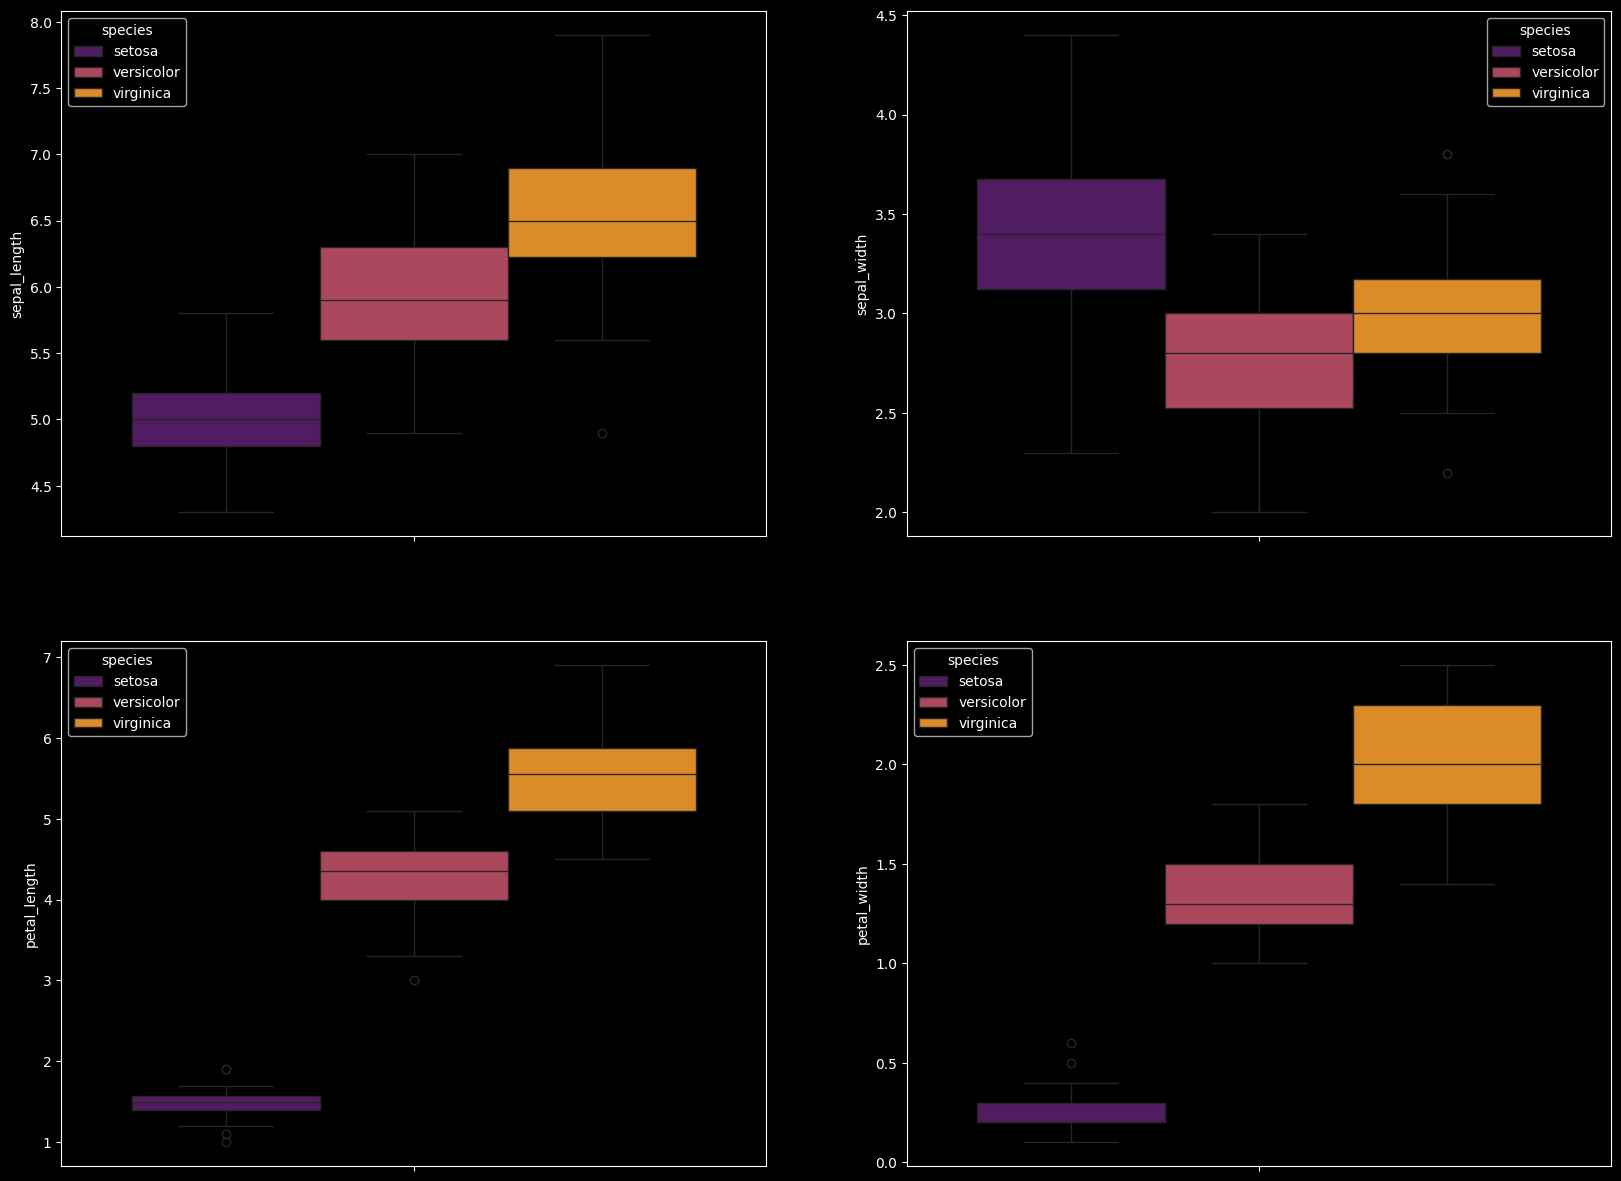

In [16]:
fig, axs = plt.subplots(2, 2, figsize=(20, 15))
axs = axs.flatten()

for i, label in enumerate(features):
    sns.boxplot(data=df, hue="species", y=label, palette="inferno", ax=axs[i])

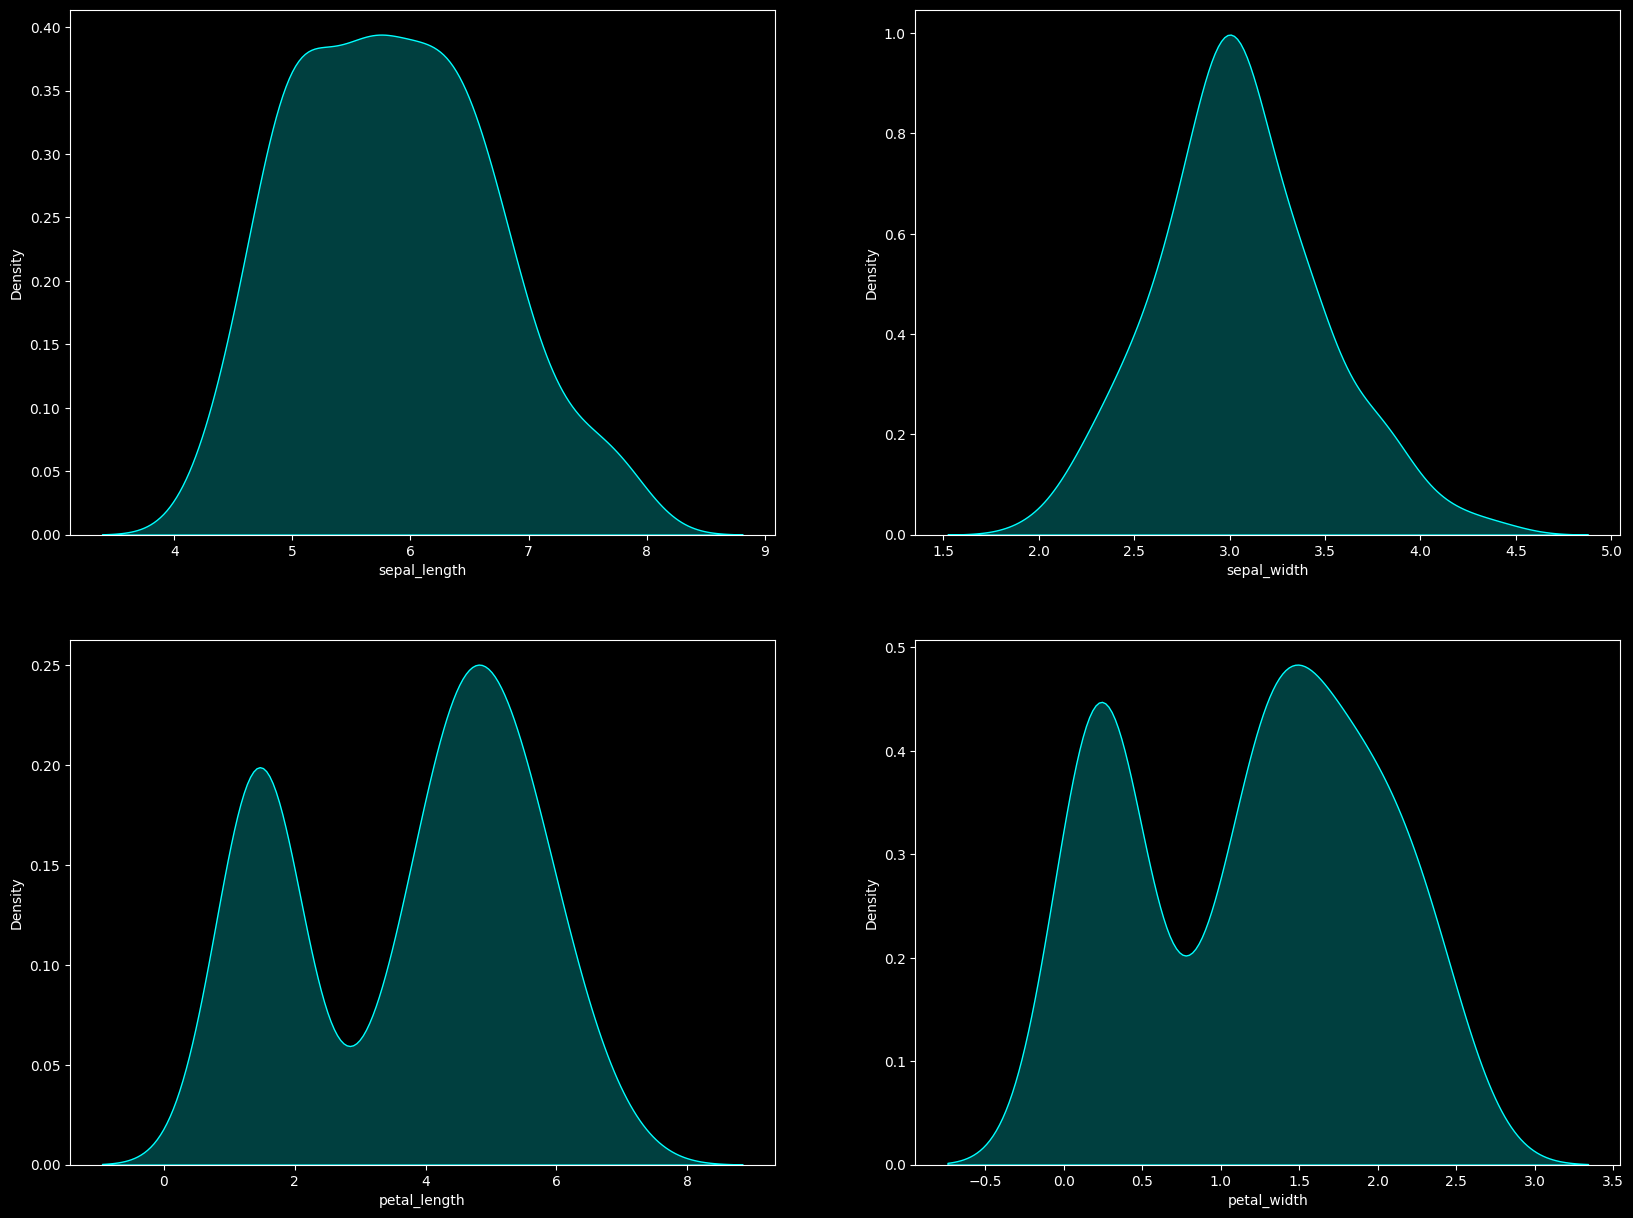

In [17]:
fig, axs = plt.subplots(2, 2, figsize=(20, 15))
axs = axs.flatten()

for i, label in enumerate(features):
    sns.kdeplot(data=df, x=label, fill=True, ax=axs[i], color="cyan")

<Axes: >

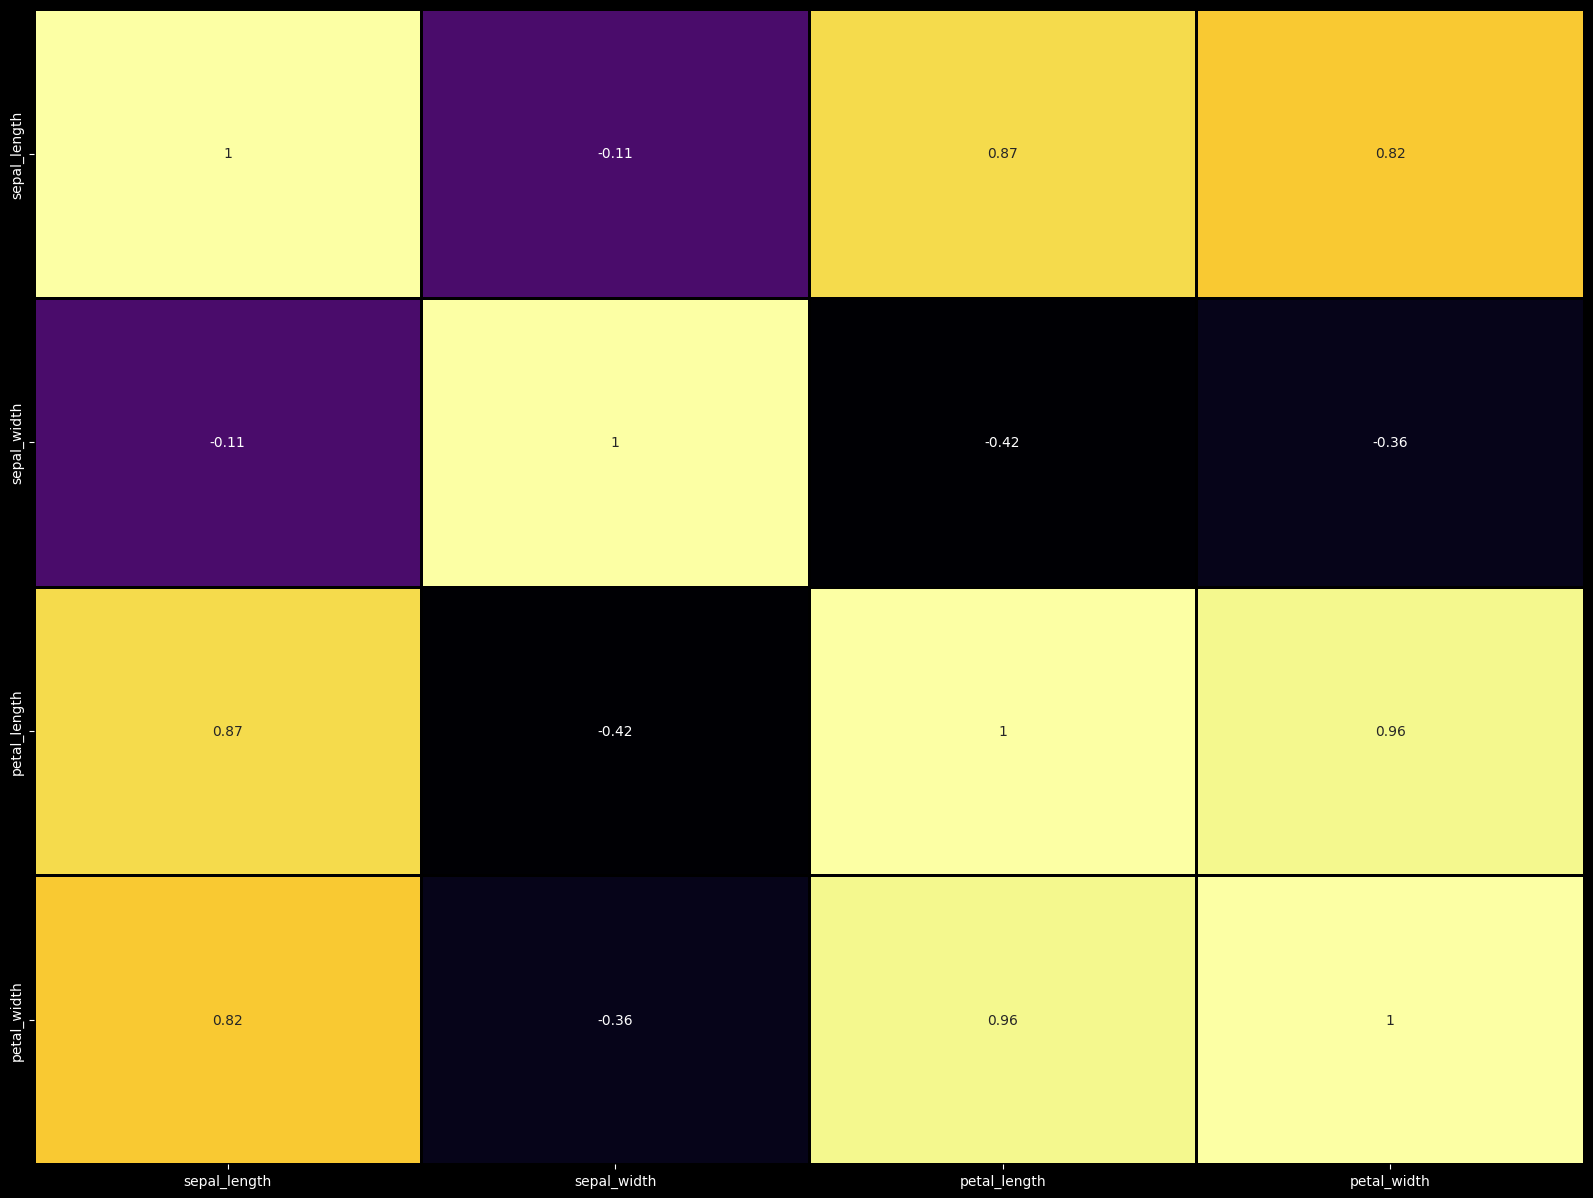

In [18]:
cm = df[features].corr()

plt.figure(figsize=(20, 15))
sns.heatmap(
    data=cm, annot=True, cbar=False, cmap="inferno", linecolor="black", linewidths=1
)